# 🤖 💬 ***NATURAL LANGUAGE PROCESSING: SENTIMENT ANALYSIS*** 🤖 💬




This is a Natural Language Processing Project for sentiment analysis done on spotify app reviews from google store, implemented in python using neural networks. 

The dataset was procured from kaggle. It consists of approximately 3.4 million records. 

Link:https://www.kaggle.com/datasets/bwandowando/3-4-million-spotify-google-store-reviews

# 📚 ***Importing all necessary libraries***

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from numpy import asarray
from numpy import zeros
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Flatten, Embedding , LSTM
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# 📥 ***Loading the Dataset: SPOTIFY GOOGLE STORE REVIEWS*** 🎵

In [103]:
df = pd.read_csv('/kaggle/input/3-4-million-spotify-google-store-reviews/SPOTIFY_REVIEWS.csv')

In [104]:
df.head()

,Unnamed: 0,review_id,pseudo_author_id,author_name,review_text,review_rating,review_likes,author_app_version,review_timestamp
0,0,14a011a8-7544-47b4-8480-c502af0ac26f,152618553977019693742,A Google user,Use it every day,5,1,1.1.0.91,2014-05-27 14:21:48
1,1,bfa8876b-470e-4640-83a7-77427f7f37e8,234382942865437071667,A Google user,"I enjoy the awesome UI of this app, and it has...",5,4,1.1.0.91,2014-05-27 14:36:02
2,2,70e8252f-058a-47d9-b066-df9e1571c970,174473604608358796368,A Google user,Love it! Especially the new design!,5,2,1.1.0.91,2014-05-27 14:40:01
3,3,672a155a-e81e-4d28-bdeb-a74c031bc072,286593453219054880269,A Google user,"Awesome UI, best music app out there!",5,1,1.1.0.91,2014-05-27 15:17:20
4,4,bbc1bf95-ed36-41a1-8b98-0f2e314caea5,167276875678680630145,A Google user,As a professional Android developer I'm glad t...,5,10,1.1.0.91,2014-05-27 15:26:48


# 🌐 ***Understanding the dataset***

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3377423 entries, 0 to 3377422
Data columns (total 9 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Unnamed: 0          int64 
 1   review_id           object
 2   pseudo_author_id    object
 3   author_name         object
 4   review_text         object
 5   review_rating       int64 
 6   review_likes        int64 
 7   author_app_version  object
 8   review_timestamp    object
dtypes: int64(3), object(6)
memory usage: 231.9+ MB


In [106]:
df.shape

(3377423, 9)

# ⚙️ ***Preprocessing!***

In [107]:
df.isnull().sum() #Null values

Unnamed: 0                 0
review_id                  0
pseudo_author_id           0
author_name                0
review_text             1022
review_rating              0
review_likes               0
author_app_version    666423
review_timestamp           0
dtype: int64

In [108]:
df.isna().sum() #Empty Values 

Unnamed: 0                 0
review_id                  0
pseudo_author_id           0
author_name                0
review_text             1022
review_rating              0
review_likes               0
author_app_version    666423
review_timestamp           0
dtype: int64

In [109]:
#Removing columns that are not required
df = df.drop(['Unnamed: 0','review_id','pseudo_author_id','author_name','author_app_version','review_timestamp','review_likes'], axis=1)

In [110]:
df.head() #dataset after removing unnecessary columns

,review_text,review_rating
0,Use it every day,5
1,"I enjoy the awesome UI of this app, and it has...",5
2,Love it! Especially the new design!,5
3,"Awesome UI, best music app out there!",5
4,As a professional Android developer I'm glad t...,5


In [111]:
df.isna().sum() 

review_text      1022
review_rating       0
dtype: int64

In [112]:
df=df.dropna() #dropping empty values directly since there are only a thousand such records.

In [113]:
df.isna().sum() #after removal of empty values

review_text      0
review_rating    0
dtype: int64

In [114]:
df.shape #size of the dataset

(3376401, 2)

In [115]:
df['review_rating'].value_counts() #distribution of ratings

review_rating
5    2184997
1     530810
4     348767
3     178503
2     133323
0          1
Name: count, dtype: int64

**Mapping Ratings to sentiments:**


*0-2 => Negative* 

*3 => Neutral*

*4-5 => Positive*

In [116]:
df['sentiment'] = 'Negative' #adding a new column sentiment and setting all values to negative

In [117]:
df.head() 

,review_text,review_rating,sentiment
0,Use it every day,5,Negative
1,"I enjoy the awesome UI of this app, and it has...",5,Negative
2,Love it! Especially the new design!,5,Negative
3,"Awesome UI, best music app out there!",5,Negative
4,As a professional Android developer I'm glad t...,5,Negative


In [118]:
#making changes according to defined classes for sentiments
df.loc[(df['review_rating'] >= 4) & (df['review_rating'] <= 5), 'sentiment'] = 'Positive'
df.loc[df['review_rating'] == 3, 'sentiment'] = 'Neutral'

In [119]:
df['sentiment'].value_counts() # checking the distribution of sentiment classes

sentiment
Positive    2533764
Negative     664134
Neutral      178503
Name: count, dtype: int64

In [120]:
df['review_rating'].value_counts()

review_rating
5    2184997
1     530810
4     348767
3     178503
2     133323
0          1
Name: count, dtype: int64

In [121]:
df.drop(df[df['review_rating'] == 0].index, inplace=True) # dropping the only one review with zero rating

In [122]:
df['review_rating'].value_counts()

review_rating
5    2184997
1     530810
4     348767
3     178503
2     133323
Name: count, dtype: int64

In [123]:
df.shape #checking the shape again

(3376400, 3)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


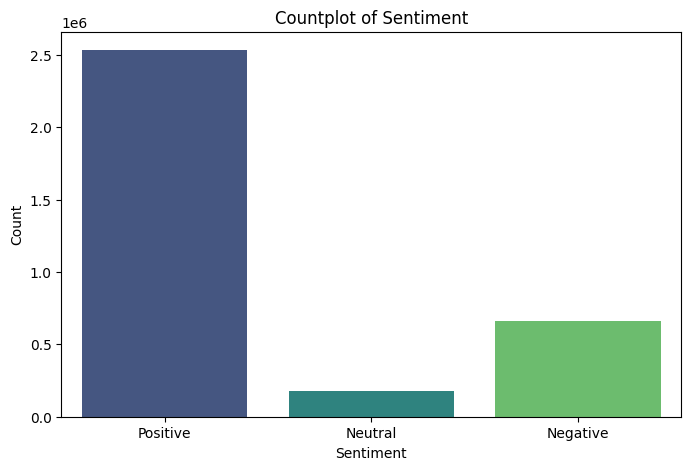

In [124]:
#Plotting counts of sentiment classes for visualization
plt.figure(figsize=(8, 5))
sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Countplot of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# 🧹 ***Text Cleaning Process***

In [125]:
df['review_text'][2663930] #selecting any random review

'My favourite music streaming app and have been a loyal premium member for years now. Happy to see spotify for android is slowly getting more features like spotify for ios :)'

In [126]:
#text cleaning function
def text_cleaning(text):
    text=text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[\'"…]', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub(r'\s+', ' ', text)  
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', text)
    return text

In [127]:
df['review_text'] = df['review_text'].apply(lambda x: text_cleaning(x)) # applying the function to review_text column

# ✂️ ***Splitting the Data***

In [128]:
X=df[['review_text','review_rating']] #predictors

In [129]:
X.head() 

,review_text,review_rating
0,use every day,5
1,enjoy awesome ui app music one ask,5
2,love especially new design,5
3,awesome ui best music app,5
4,professional android developer glad see spotif...,5


In [130]:
y=df['sentiment'] #target

In [131]:
y.head()

0    Positive
1    Positive
2    Positive
3    Positive
4    Positive
Name: sentiment, dtype: object

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) #training & testing split (80:20)

In [133]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2701120, 2)
(2701120,)
(675280, 2)
(675280,)


# 🔠 ***Vocabulary Creation***

In [135]:
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(X_train['review_text'])

In [136]:
X_train = word_tokenizer.texts_to_sequences(X_train['review_text'])
X_test = word_tokenizer.texts_to_sequences(X_test['review_text'])

In [137]:
vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

288602

# 📏 ***Input Padding***

In [138]:
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# 🧮 ***Creation of Embedding Matrix***

In [139]:
embeddings_dictionary = dict()
glove_file = open('/kaggle/input/glove/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [140]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [141]:
embedding_matrix.shape

(288602, 100)

# 🏭 ***Modelling***

* Long-Short Term Memory Networks are addequaltely suited for processing sequential data. 
* Text(s)/sentences are a type of sequential data because when we read or process natural language, we do so in a sequential manner, considering the order of words and their arrangement to derive meaning.

In [142]:
lstm_model = Sequential()
embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)

lstm_model.add(embedding_layer)
lstm_model.add(LSTM(128))

lstm_model.add(Dense(3, activation='softmax'))

In [143]:
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [144]:
print(lstm_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          28860200  
                                                                 
 lstm_1 (LSTM)               (None, 128)               117248    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                                 
Total params: 28977835 (110.54 MB)
Trainable params: 117635 (459.51 KB)
Non-trainable params: 28860200 (110.09 MB)
_________________________________________________________________
None


In [145]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

In [146]:
y_train_one_hot = to_categorical(y_train_encoded, num_classes=3)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=3)

In [147]:
lstm_model_history = lstm_model.fit(X_train, y_train_one_hot, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
16882/16882 [==============================] - 167s 10ms/step - loss: 0.3780 - accuracy: 0.8687 - val_loss: 0.3434 - val_accuracy: 0.8805
Epoch 2/5
16882/16882 [==============================] - 164s 10ms/step - loss: 0.3426 - accuracy: 0.8802 - val_loss: 0.3362 - val_accuracy: 0.8828
Epoch 3/5
16882/16882 [==============================] - 164s 10ms/step - loss: 0.3301 - accuracy: 0.8843 - val_loss: 0.3358 - val_accuracy: 0.8831
Epoch 4/5
16882/16882 [==============================] - 164s 10ms/step - loss: 0.3236 - accuracy: 0.8865 - val_loss: 0.3298 - val_accuracy: 0.8850
Epoch 5/5
16882/16882 [==============================] - 164s 10ms/step - loss: 0.3187 - accuracy: 0.8883 - val_loss: 0.3285 - val_accuracy: 0.8852


In [148]:
score = lstm_model.evaluate(X_test, y_test_one_hot, verbose=1)

21103/21103 [==============================] - 92s 4ms/step - loss: 0.3313 - accuracy: 0.8838


In [149]:
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.3313367962837219
Test Accuracy: 0.8837682008743286


# 📊 ***Plotting Accuracy of the Model***

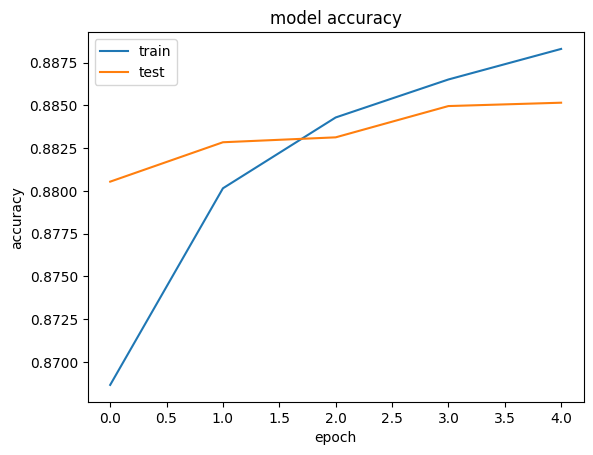

In [150]:
plt.plot(lstm_model_history.history['accuracy'])
plt.plot(lstm_model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

# 🔍 ***Making a Prediction on an Unseen Review***

In [151]:
review_=[]
new_review = input("Input a new review to check it's sentiment (Make Prediction) = ")
review_.append(new_review)
sample=pd.DataFrame(review_, columns=["review_text"])
print(sample)

Input a new review to check it's sentiment (Make Prediction) =  such a nice app, will come back for 2nds (^^)


                                     review_text
0  such a nice app, will come back for 2nds (^^)


In [152]:
unseen_reviews = sample

unseen_processed = []
for review in unseen_reviews['review_text']:
    print(review)
    reviewed = text_cleaning(review)
    unseen_processed.append(reviewed)

print(unseen_processed)

such a nice app, will come back for 2nds (^^)
['nice app come back ']


In [153]:
unseen_tokenized = word_tokenizer.texts_to_sequences(unseen_processed)
print(unseen_tokenized)

[[21, 1, 254, 48]]


In [154]:
unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=maxlen)
print(unseen_padded)

[[ 21   1 254  48   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]]


In [155]:
unseen_sentiment = lstm_model.predict(unseen_padded)
print(unseen_sentiment)

1/1 [==============================] - 0s 358ms/step
[[0.02842169 0.02633042 0.9452479 ]]


In [156]:
predicted_class_index = np.argmax(unseen_sentiment)
if predicted_class_index == 0:
    print("Sentiment of the review is Negative")
elif predicted_class_index == 1:
    print("Sentiment of the review is Neutral")
else:
    print("Sentiment of the review is Positive")

Sentiment of the review is Positive


# ➡️ ***Function which can be used for predictions***

In [177]:
def predict_sentiment():
    review_=[]
    new_review = input("Input a new review to check it's sentiment (Make Prediction) = ")
    review_.append(new_review)
    sample=pd.DataFrame(review_, columns=["review_text"])
    unseen_reviews = sample
    unseen_processed = []
    for review in unseen_reviews['review_text']:
        reviewed = text_cleaning(review)
        unseen_processed.append(reviewed)
    unseen_tokenized = word_tokenizer.texts_to_sequences(unseen_processed)
    unseen_padded = pad_sequences(unseen_tokenized, padding='post', maxlen=maxlen)
    unseen_sentiment = lstm_model.predict(unseen_padded)
    print(unseen_sentiment)
    predicted_class_index = np.argmax(unseen_sentiment)
    if predicted_class_index == 0:
        print("Sentiment of the review is Negative")
    elif predicted_class_index == 1:
        print("Sentiment of the review is Neutral")
    else:
        print("Sentiment of the review is Positive")

In [192]:
predict_sentiment()

Input a new review to check it's sentiment (Make Prediction) =  After being a great app for several years Spotify has a very difficult time downloading my playlists. It begins downloading and freezes after a short while. I've already gone through all troubleshooting steps. Fresh install, fully updated, premium membership, solid internet connection, plenty of space on my phone, switched a bunch of settings off and on again, etc. The developers need to fix their app or else I'll be returning to the mp3 era.


1/1 [==============================] - 0s 19ms/step
[[0.69992775 0.19832562 0.10174663]]
Sentiment of the review is Negative
